# MLT Assignment
### Based on spotify's songs
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [18]:
# Import the data
import pandas as pd
df = pd.read_csv('dataset.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [19]:
print(df.shape)
df.info()
# We see a wide range of data types

(114000, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence     

In [20]:
# Check for nulls and missing values
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [21]:
df[df.isnull().any(axis=1)]
# This isn't a lot of meaningful null values to really show different techniques, let's introduce more nulls

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


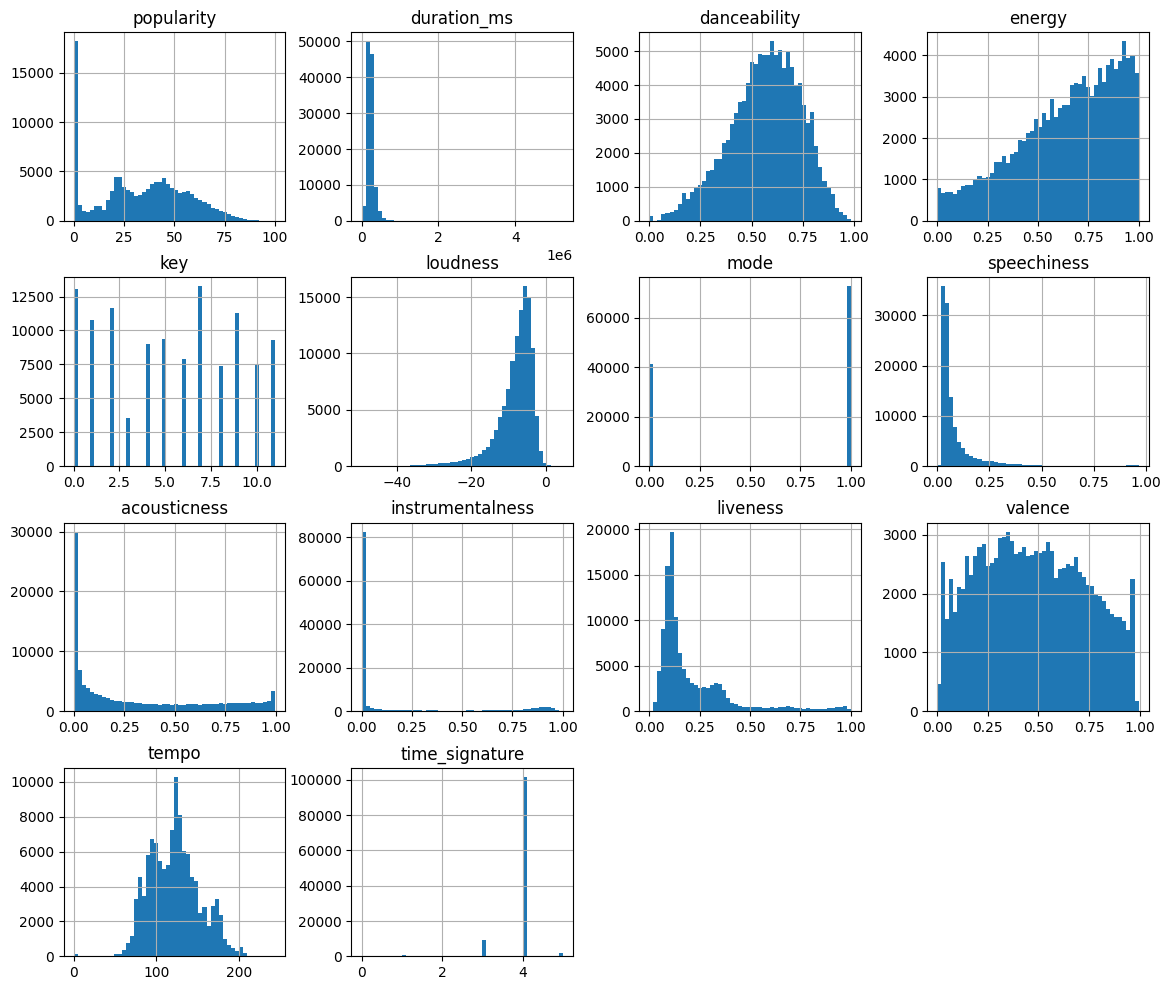

In [22]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(14, 12))
plt.show()

In [23]:
# Change random values for random rows to null
import numpy as np
df.iloc[np.random.randint(0, len(df), 10), 11] = np.nan # Introduce nans to loudness column
df.iloc[np.random.randint(0, len(df), 10), 9] = np.nan # Introduce nans to energy column
df.iloc[np.random.randint(0, len(df), 10), 8] = np.nan # Introduce nans to danceability column
print(df.isnull().sum())


track_id             0
artists              1
album_name           1
track_name           1
popularity           0
duration_ms          0
explicit             0
danceability         0
energy              10
key                 10
loudness             0
mode                10
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
dtype: int64


# Feature Engineering

In [24]:
# Transform 'explicit' to 0 or 1
df['explicit'] = df['explicit'].astype(int)
df['explicit'][0]
# It worked!

0

In [25]:
# Encode the genre column to numerical values
# I will use One Hot Encoding, it's the most common and easy to understand - it causes the number of columns to explode though so I might change it in the future
# df = pd.get_dummies(df, columns=['track_genre'])
# We now have...
# print(df.shape)
# 133 columns, from 20

# UPDATE:
# I'm going to try Label Encoding instead

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['track_genre_labeled'] = le.fit_transform(df['track_genre'])
df
# It's now one column, doesn't take up as much space - but the values might be misleading, 
# as they are now numerical values, genres might be interepreted in a different way

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_labeled
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1.0,...,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1.0,...,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0.0,...,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0.0,...,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2.0,...,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5.0,...,1.0,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0.0,...,0.0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0.0,...,0.0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7.0,...,1.0,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [27]:
# Let's drop the track_genre column
df = df.drop(columns=['track_genre'])
# Drop other columns that are not needed
df = df.drop(columns=['track_id', 'track_name', 'artists', 'album_name',])

In [28]:
# Drop all columns with popularity 0
# This was added later on, the RMSE decreased by 200!
# The popularity column was heavily skewed towards 0
df = df[df.popularity > 10]

<Axes: >

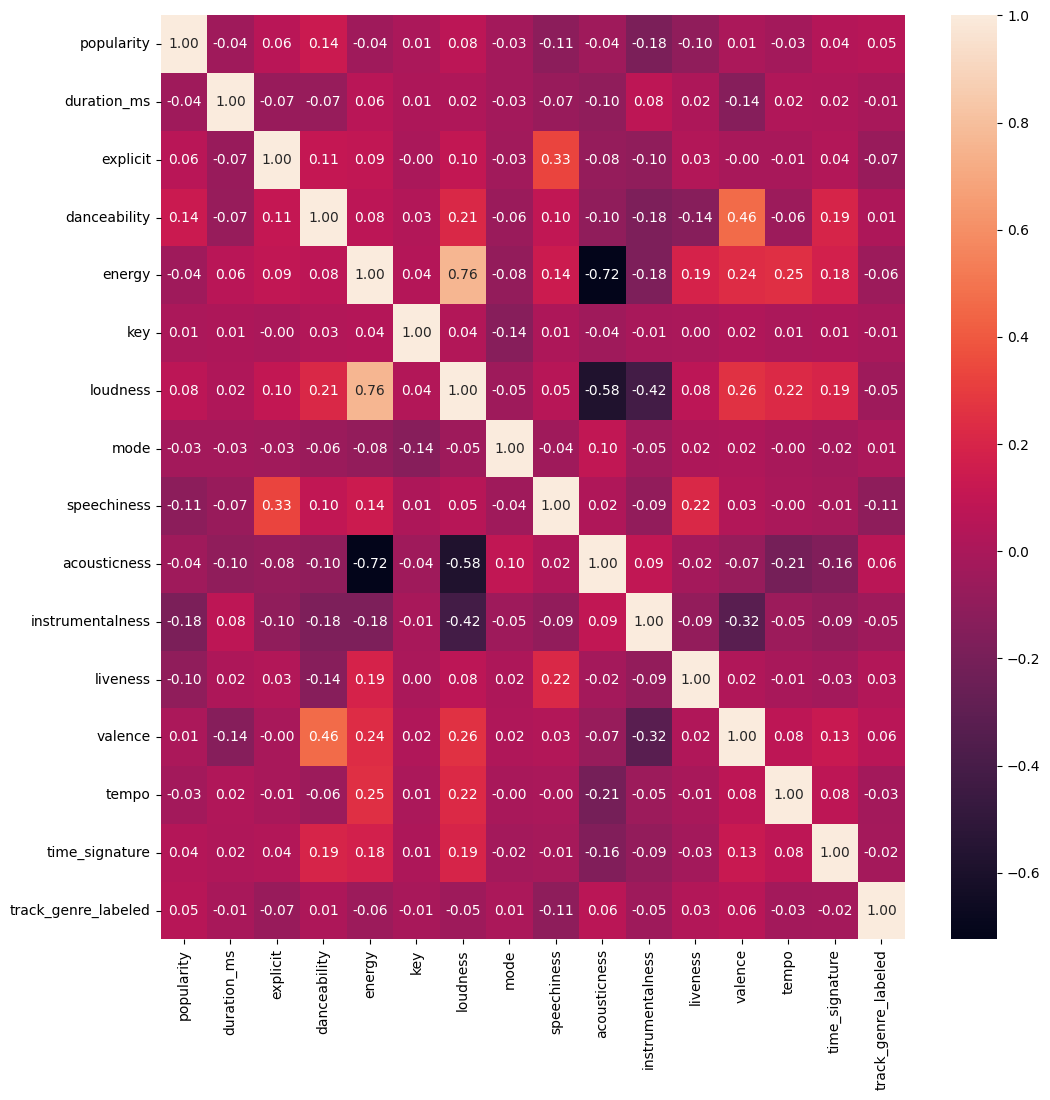

In [29]:
import seaborn as sns
# Which values are correlated with each other?
corr_matrix = df.select_dtypes(include=["int","float"]).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# We can see that loudness and energy are highly correlated, not enough to drop one of them though

In [30]:
# Let's impute the values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)
df_imputed = imputer.transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed.isnull().sum()

popularity             0
duration_ms            0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre_labeled    0
dtype: int64

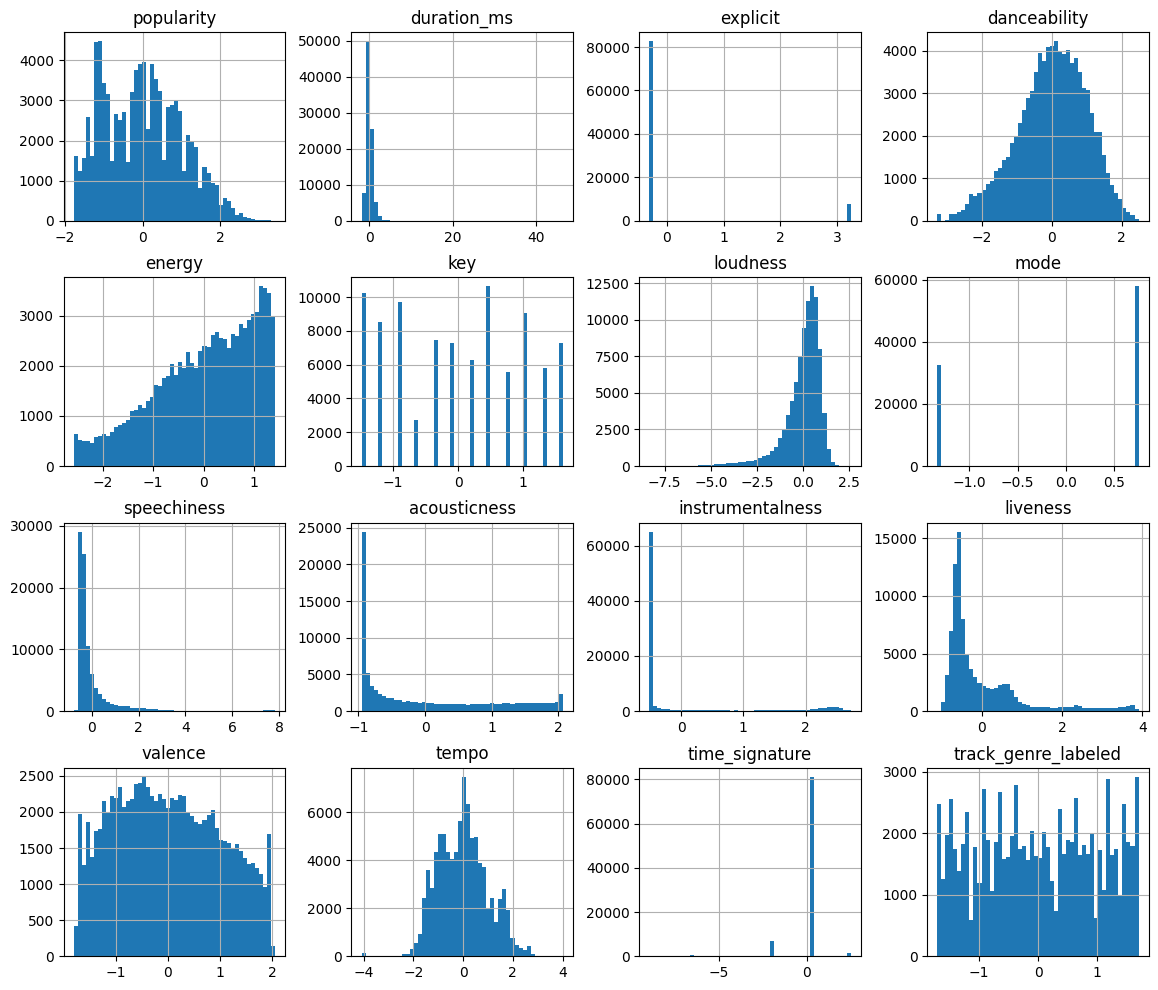

In [31]:
# Let's scale the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.hist(bins=50, figsize=(14, 12))
plt.show()

In [32]:
# We could also do this using a Pipeline
from sklearn.pipeline import Pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
new_df = preprocessing_pipeline.fit_transform(df_imputed)

new_df = pd.DataFrame(new_df, columns=df.columns)

## KN Analysis

In [33]:
# Convert popularity to category <20, 20-40, 40-60, 60-80, 80-100

kn_df = df.copy()
kn_df['popularity'] = kn_df['popularity'].astype(int)

# Impute everything except popularity
impute_df = kn_df.drop(columns=['popularity'])
impute_df = preprocessing_pipeline.fit_transform(impute_df)
impute_df = pd.DataFrame(impute_df, columns=df.columns[1:])
impute_df['popularity'] = kn_df['popularity'].astype(int)
kn_df = impute_df


In [34]:
labels = ['Not Popular', 'Emerging', 'Semi Popular', 'Popular', 'Very Popular']
num_labels = [0, 1, 2, 3, 4]

kn_df['popularity'] = pd.cut(kn_df['popularity'], bins=[0, 20, 40, 60, 80, 100], labels=num_labels)
kn_df.dropna(subset=['popularity'], inplace=True)
kn_df['popularity'] = kn_df['popularity'].astype('int')

kn_df['popularity'] = kn_df['popularity'].astype('int')
kn_df.reset_index()
kn_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_labeled,popularity
0,0.014628,-0.308867,0.675358,-0.738368,-1.206518,0.298583,-1.330388,0.501794,-0.856928,-0.508652,0.684741,0.964935,-1.158628,0.216750,-1.704720,3
1,-0.736645,-0.308867,-0.826160,-1.914881,-1.206518,-1.816451,0.751660,-0.091831,1.846649,-0.508637,-0.604565,-0.770119,-1.505421,0.216750,-1.704720,2
2,-0.169260,-0.308867,-0.720585,-1.145162,-1.488094,-0.303927,0.751660,-0.275170,-0.317911,-0.508655,-0.524297,-1.339433,-1.543898,0.216750,-1.704720,2
3,-0.251685,-0.308867,-1.729418,-2.339223,-1.488094,-2.074554,0.751660,-0.447828,1.789049,-0.508427,-0.449046,-1.250357,1.961551,-2.081967,-1.704720,3
4,-0.280233,-0.308867,0.335171,-0.810155,-0.924942,-0.293240,0.751660,-0.302760,0.467273,-0.508655,-0.695368,-1.157407,-0.093371,0.216750,-1.704720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90533,1.445074,-0.308867,-2.280757,-1.639696,-0.080214,-1.646668,0.751660,-0.395319,0.985676,2.489877,-0.678311,-1.672889,0.107695,2.515468,1.700516,1
90534,1.445083,-0.308867,-2.269026,-2.110301,-1.488094,-2.034830,-1.330388,-0.414009,2.058861,2.644974,-0.584498,-1.668629,-1.247687,0.216750,1.700516,1
90535,0.392786,-0.308867,0.399689,-1.264807,-1.488094,-0.538034,-1.330388,-0.397099,1.673848,-0.508655,-0.690352,1.073376,0.319968,0.216750,1.700516,1
90536,0.507966,-0.308867,0.153346,-0.558900,0.482938,-0.536824,0.751660,-0.506568,0.200492,-0.508655,0.243267,-0.204677,0.439091,0.216750,1.700516,1


In [43]:

from sklearn.neighbors import KNeighborsClassifier

k = 12
stepsize = 0.01

X = kn_df.drop(columns=['popularity'])
y = kn_df['popularity']

X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_labeled
0,0.014628,-0.308867,0.675358,-0.738368,-1.206518,0.298583,-1.330388,0.501794,-0.856928,-0.508652,0.684741,0.964935,-1.158628,0.216750,-1.704720
1,-0.736645,-0.308867,-0.826160,-1.914881,-1.206518,-1.816451,0.751660,-0.091831,1.846649,-0.508637,-0.604565,-0.770119,-1.505421,0.216750,-1.704720
2,-0.169260,-0.308867,-0.720585,-1.145162,-1.488094,-0.303927,0.751660,-0.275170,-0.317911,-0.508655,-0.524297,-1.339433,-1.543898,0.216750,-1.704720
3,-0.251685,-0.308867,-1.729418,-2.339223,-1.488094,-2.074554,0.751660,-0.447828,1.789049,-0.508427,-0.449046,-1.250357,1.961551,-2.081967,-1.704720
4,-0.280233,-0.308867,0.335171,-0.810155,-0.924942,-0.293240,0.751660,-0.302760,0.467273,-0.508655,-0.695368,-1.157407,-0.093371,0.216750,-1.704720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90533,1.445074,-0.308867,-2.280757,-1.639696,-0.080214,-1.646668,0.751660,-0.395319,0.985676,2.489877,-0.678311,-1.672889,0.107695,2.515468,1.700516
90534,1.445083,-0.308867,-2.269026,-2.110301,-1.488094,-2.034830,-1.330388,-0.414009,2.058861,2.644974,-0.584498,-1.668629,-1.247687,0.216750,1.700516
90535,0.392786,-0.308867,0.399689,-1.264807,-1.488094,-0.538034,-1.330388,-0.397099,1.673848,-0.508655,-0.690352,1.073376,0.319968,0.216750,1.700516
90536,0.507966,-0.308867,0.153346,-0.558900,0.482938,-0.536824,0.751660,-0.506568,0.200492,-0.508655,0.243267,-0.204677,0.439091,0.216750,1.700516


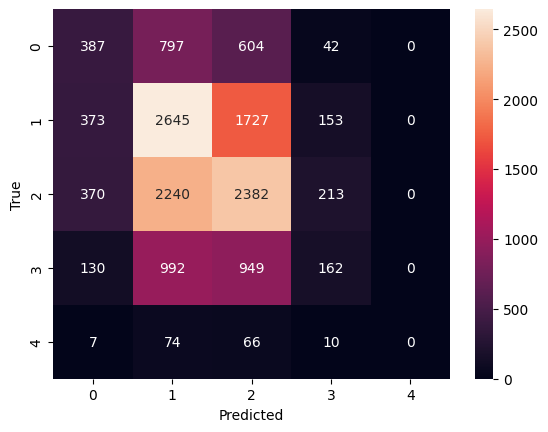

In [47]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Models


I want to try 3 different models and compare them

- Decision Tree
- Random Forest Regressor
- XGBoost
- LinearRegression

## Decision Tree

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
def visualize(y_test, y_pred, model):
    plt.figure(figsize=(12, 12))
    plt.scatter(y_test, y_pred,alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()
    
    mse = mean_squared_error(y_test, y_pred)
    
    print('MSE:', mse)
    print('R2:', r2_score(y_test, y_pred))

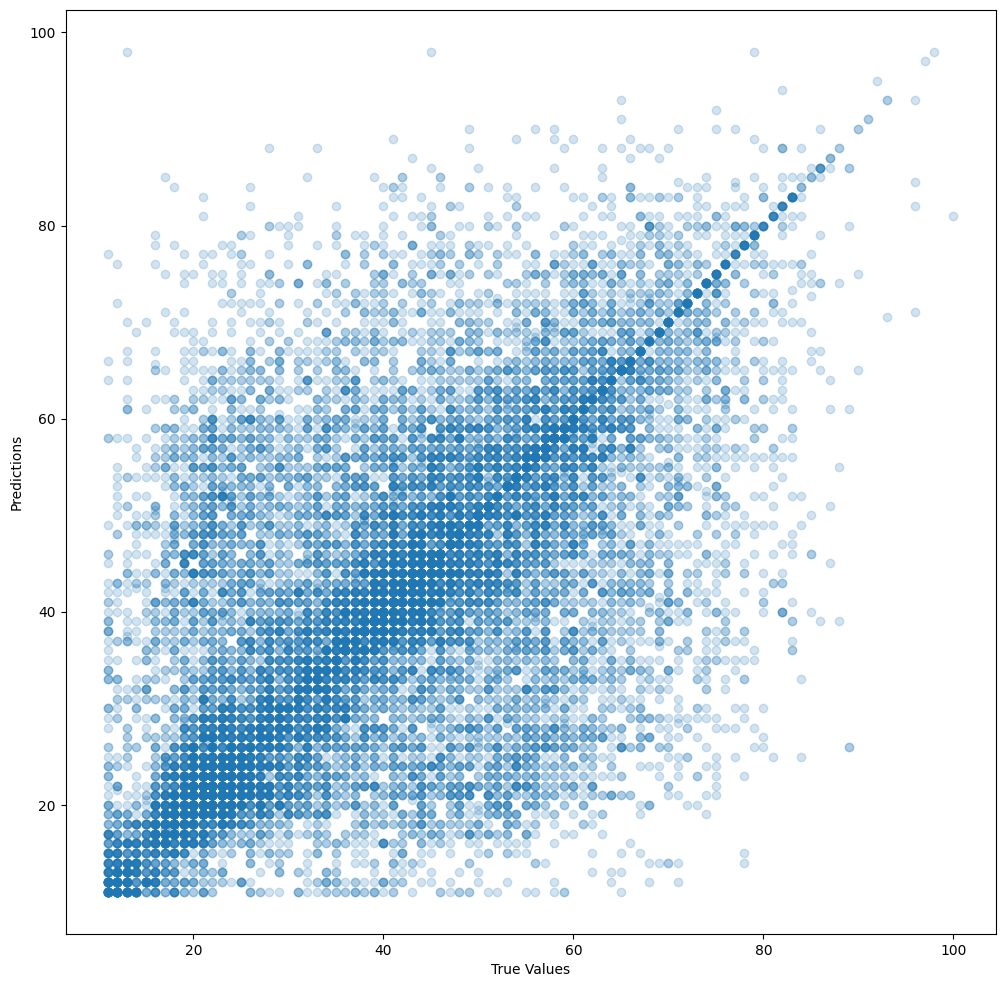

MSE: 243.2980782358319
R2: 0.17340111259979196


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('tree', DecisionTreeRegressor())
])
tree_reg.fit(X_train, y_train)

predictions = tree_reg.predict(X_test)

visualize(y_test, predictions, tree_reg)

## Random Forest Regressor

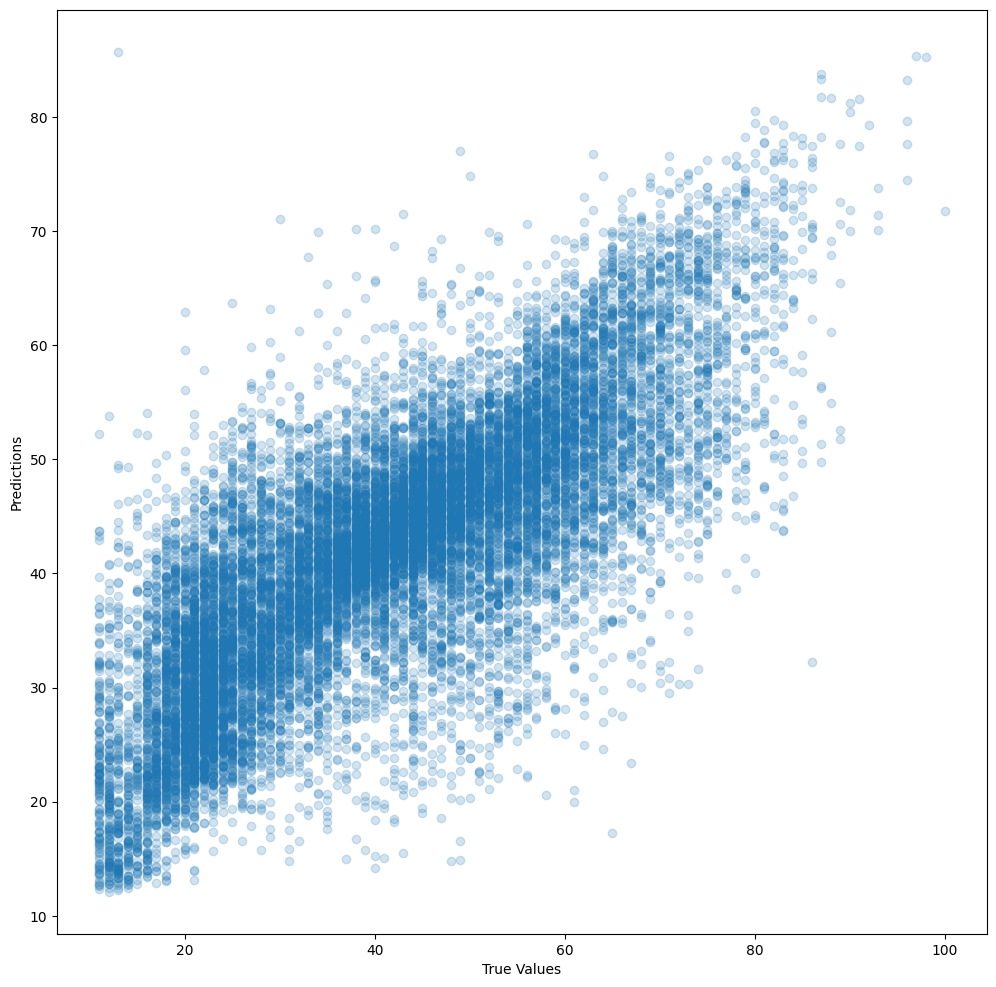

MSE: 119.83673865654501
R2: 0.5928577999405631


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('forest', RandomForestRegressor())
])

forest_reg.fit(X_train, y_train)
forest_predictions = forest_reg.predict(X_test)

visualize(y_test, forest_predictions, forest_reg)

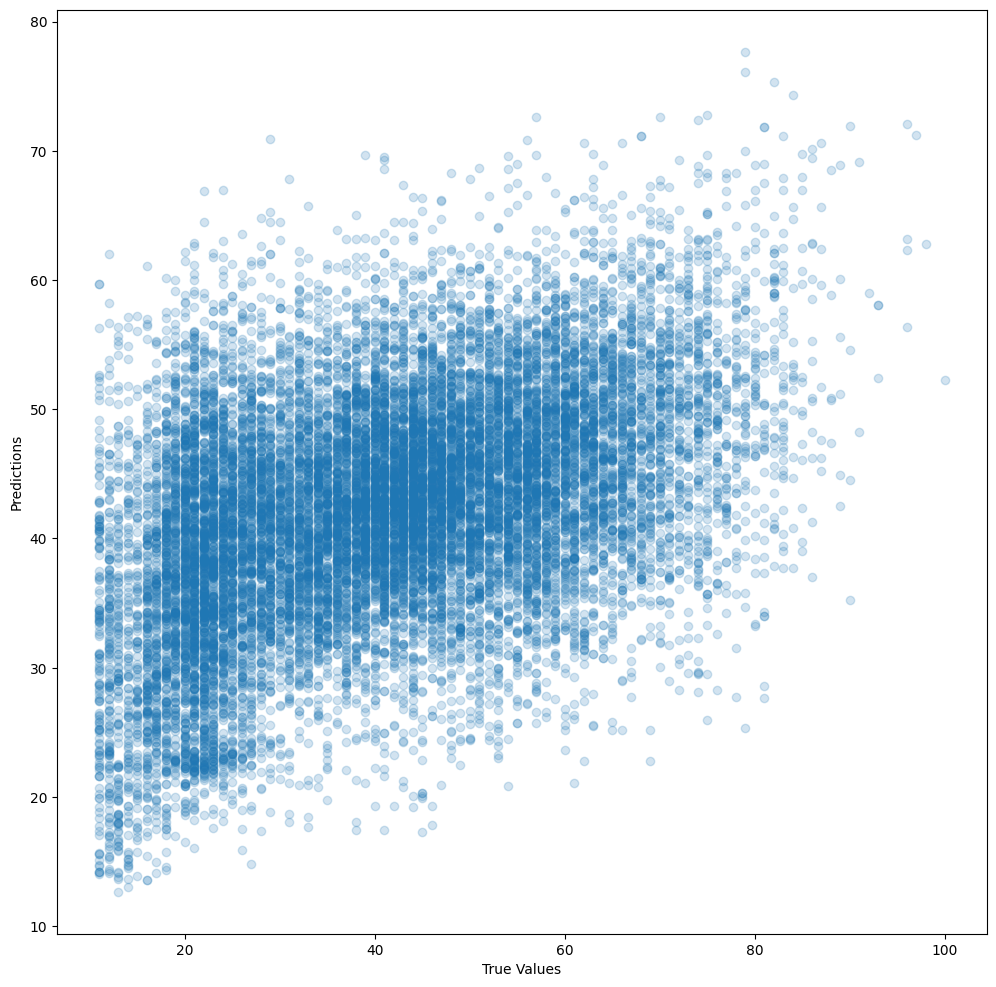

MSE: 234.04072785509166
R2: 0.20485271953594075


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

k = 12


# Use KNeighborsRegressor instead of KNeighborsClassifier
model = KNeighborsRegressor(n_neighbors=k)
kn_reg = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('knn', model)
])
kn_reg.fit(X_train, y_train)  # Use the training data

# Use the kn_reg to predict the test data
y_pred = kn_reg.predict(X_test)

visualize(y_test, y_pred, kn_reg)